In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data
import fix_yahoo_finance

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()

In [8]:
start = datetime(end.year-1,end.month,end.day)

In [9]:
for stock in tech_list:
  globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [10]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.856941
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.829674
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,72.255997
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.783936
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.444603
...,...,...,...,...,...,...
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005


In [11]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,95.656709,92.940148,94.268192,94.371778,1.532337e+08,94.058647
std,21.689606,21.165909,21.594615,21.410815,7.234265e+07,21.553979
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744217
25%,77.447502,75.492500,76.074997,76.927498,1.056336e+08,76.576187
50%,91.495003,89.392502,90.987503,91.027496,1.372808e+08,90.707176
75%,116.930000,113.927498,115.550003,115.360001,1.830554e+08,115.169998
max,137.979996,131.100006,137.589996,134.179993,4.268848e+08,133.948898


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-12-26 to 2020-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


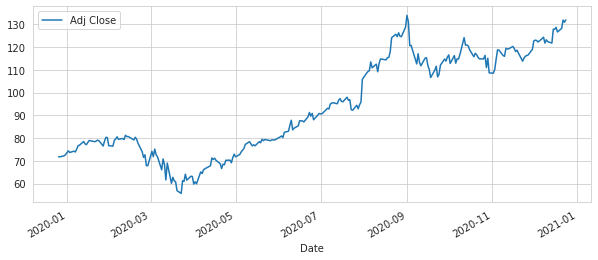

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

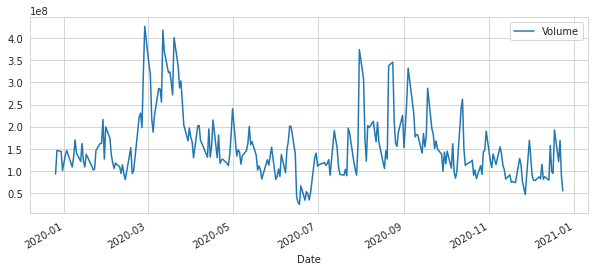

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [15]:
ma_day = [10,20,50]

In [16]:
for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))

  AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

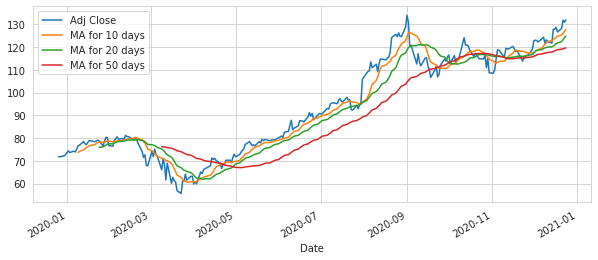

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

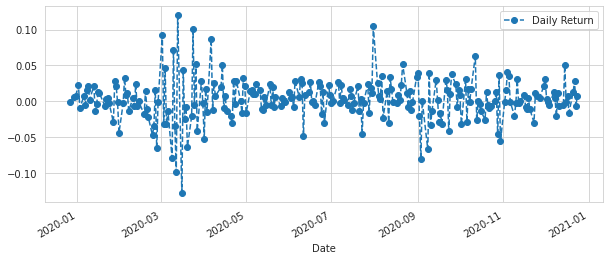

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


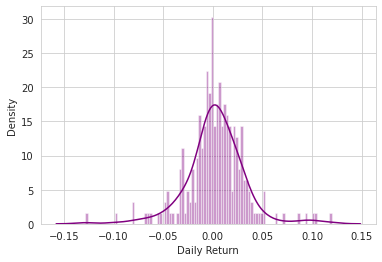

In [19]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

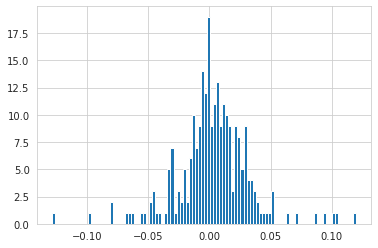

In [20]:
AAPL['Daily Return'].hist(bins=100)

In [21]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [22]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-26,71.856941,1360.400024,157.006729,1868.770020
2019-12-27,71.829674,1351.890015,157.293686,1869.800049
2019-12-30,72.255997,1336.140015,155.938049,1846.890015
2019-12-31,72.783936,1337.020020,156.046890,1847.839966
2020-01-02,74.444603,1367.369995,158.936279,1898.010010


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-26,NaN,NaN,NaN,NaN
2019-12-27,-0.000379,-0.006256,0.001828,0.000551
2019-12-30,0.005935,-0.011650,-0.008619,-0.012253
2019-12-31,0.007307,0.000659,0.000698,0.000514
2020-01-02,0.022816,0.022700,0.018516,0.027151


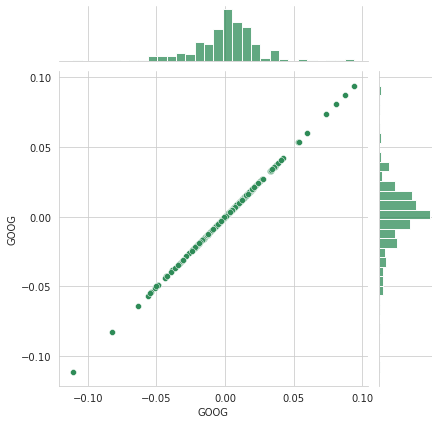

In [25]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

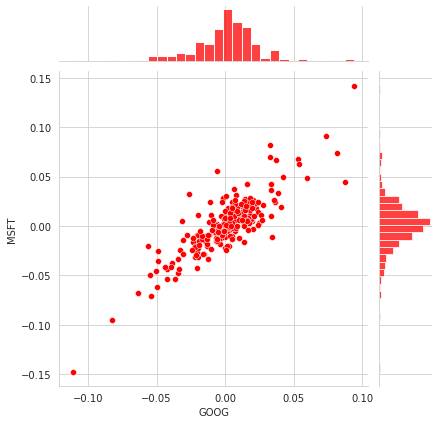

In [26]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='red')

In [27]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-26,NaN,NaN,NaN,NaN
2019-12-27,-0.000379,-0.006256,0.001828,0.000551
2019-12-30,0.005935,-0.011650,-0.008619,-0.012253
2019-12-31,0.007307,0.000659,0.000698,0.000514
2020-01-02,0.022816,0.022700,0.018516,0.027151


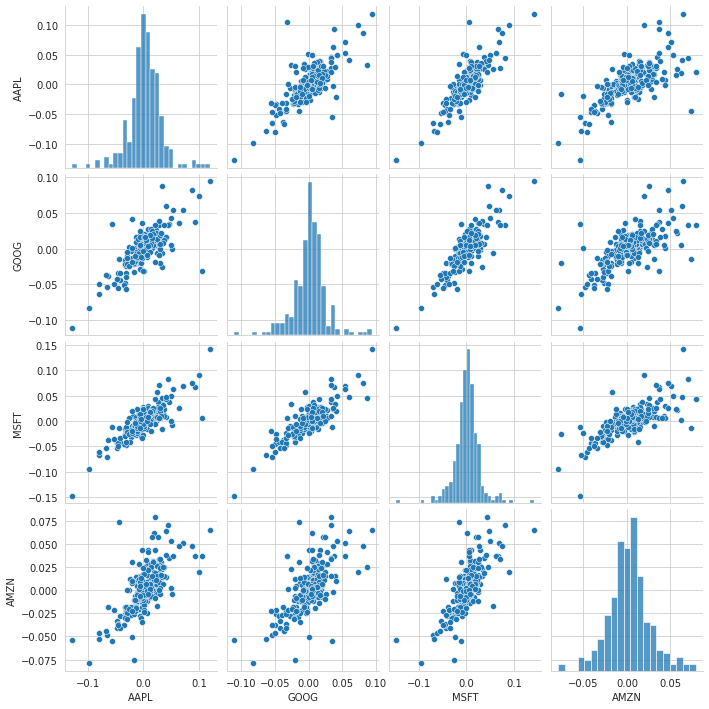

In [28]:
sns.pairplot(tech_rets.dropna())

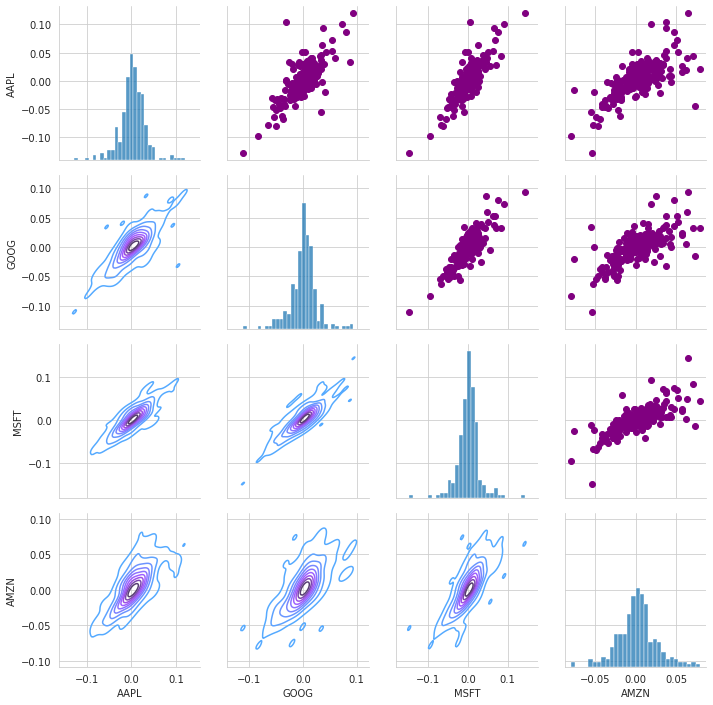

In [48]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.histplot,bins=30)

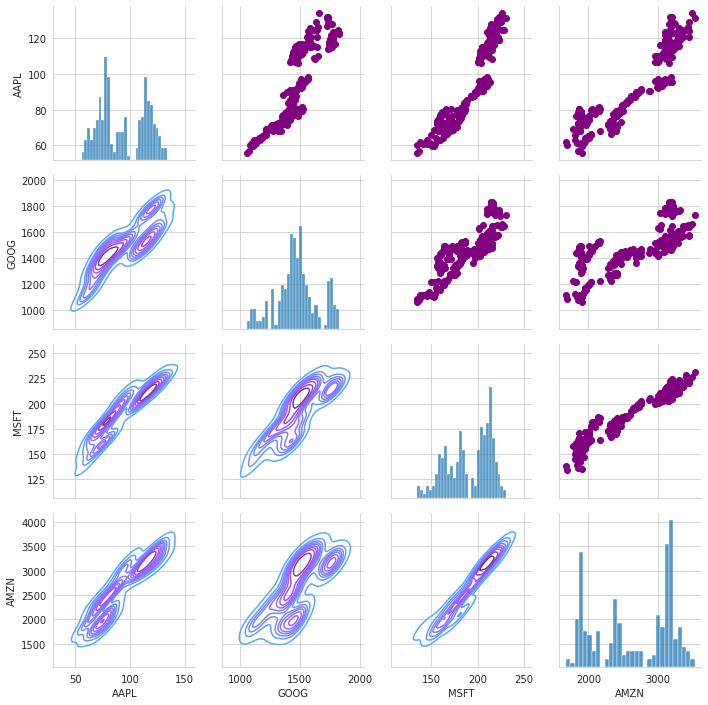

In [47]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.histplot,bins=30)

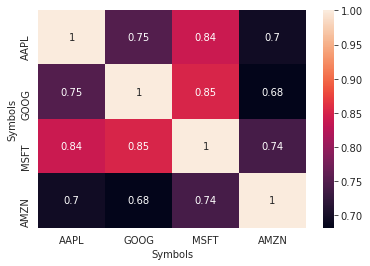

In [31]:
sns.heatmap(data = tech_rets.corr(), annot=True)

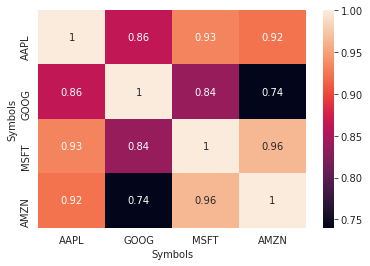

In [32]:
sns.heatmap(data = closing_df.corr(), annot=True)

In [33]:
rets = tech_rets.dropna()

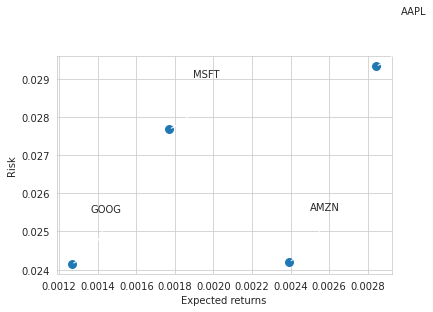

In [34]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(), s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
  plt.annotate(
      label,
      xy = (x,y), xytext = (50,50),
      textcoords = 'offset points', ha = 'right', va = 'bottom',
      arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


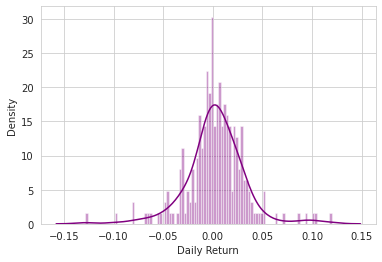

In [35]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [36]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-27,-0.000379,-0.006256,0.001828,0.000551
2019-12-30,0.005935,-0.011650,-0.008619,-0.012253
2019-12-31,0.007307,0.000659,0.000698,0.000514
2020-01-02,0.022816,0.022700,0.018516,0.027151
2020-01-03,-0.009722,-0.004907,-0.012452,-0.012139


In [37]:
rets['AAPL'].quantile(0.05)

-0.04486866478075284

In [38]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [39]:
def stock_monte_carlo(start_price,days,mu,sigma):
  price = np.zeros(days)
  price[0] = start_price

  shock = np.zeros(days)
  drift = np.zeros(days)

  for x in range(1,days):

    shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

    drift[x] = mu * dt

    price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

  return price

In [40]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400,1351.890015
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900,1336.140015
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800,1337.020020
2020-01-02,1368.140015,1341.550049,1341.550049,1367.369995,1406600,1367.369995


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

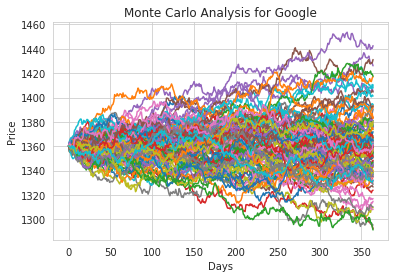

In [78]:
start_price = 1360.17

for x in range(100):
  plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [79]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

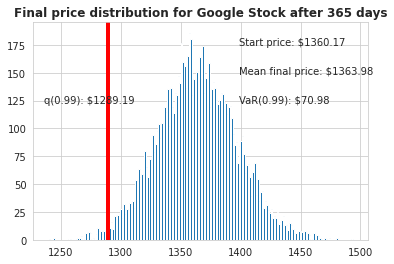

In [80]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#Starting price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price -q,))

# Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color = 'r')

#Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight = 'bold');

In [44]:
#Additional questions: 
# 1. Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

In [49]:
german_list = ['DTE.DE','DAI.DE','HOT.DE','WDI.DE']

In [54]:
stocks = { stock : data.DataReader(stock,'yahoo', start, end) for stock in german_list }

In [59]:
stocks['DTE.DE']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-27,14.758,14.612,14.758,14.716,5591396.0,13.432266
2019-12-30,14.746,14.570,14.732,14.570,5774093.0,13.299004
2020-01-02,14.668,14.534,14.598,14.610,9435019.0,13.335514
2020-01-03,14.628,14.518,14.570,14.614,9232877.0,13.339165
2020-01-06,14.612,14.464,14.580,14.578,7337533.0,13.306305
...,...,...,...,...,...,...
2020-12-17,15.200,15.025,15.140,15.035,12143150.0,15.035000
2020-12-18,15.225,15.020,15.040,15.095,24855032.0,15.095000
2020-12-21,15.025,14.525,15.020,14.640,14077044.0,14.640000


In [60]:
telekom_df = DataFrame(stocks['DTE.DE'])

In [61]:
telekom_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-27,14.758,14.612,14.758,14.716,5591396.0,13.432266
2019-12-30,14.746,14.570,14.732,14.570,5774093.0,13.299004
2020-01-02,14.668,14.534,14.598,14.610,9435019.0,13.335514
2020-01-03,14.628,14.518,14.570,14.614,9232877.0,13.339165
2020-01-06,14.612,14.464,14.580,14.578,7337533.0,13.306305


In [62]:
daimler_df = DataFrame(stocks['DAI.DE'])

In [63]:
hochtief_df = DataFrame(stocks['HOT.DE'])

In [64]:
wirecard_df = DataFrame(stocks['WDI.DE'])

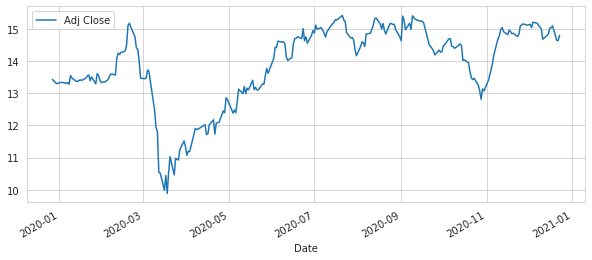

In [65]:
telekom_df['Adj Close'].plot(legend=True,figsize=(10,4))

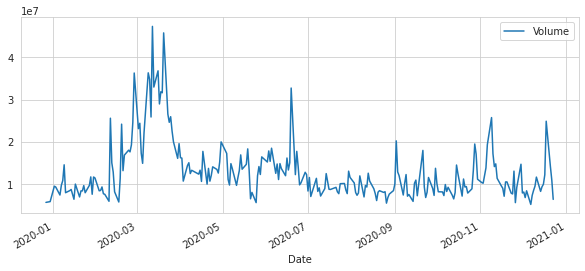

In [66]:
telekom_df['Volume'].plot(legend=True,figsize=(10,4))

In [68]:
german_closing_df = data.DataReader(german_list,'yahoo',start,end)['Adj Close']

In [69]:
german_closing_df.head()

Symbols,DTE.DE,DAI.DE,HOT.DE,WDI.DE
Date,,,,
2019-12-27,13.432266,46.919060,105.163704,106.300003
2019-12-30,13.299004,46.476604,104.703270,107.500000
2020-01-02,13.335514,47.046146,105.439972,112.400002
2020-01-03,13.339165,46.194187,103.782394,112.900002
2020-01-06,13.306305,45.944721,104.150749,111.849998


In [70]:
german_rets = german_closing_df.pct_change()

In [71]:
german_rets.head()

Symbols,DTE.DE,DAI.DE,HOT.DE,WDI.DE
Date,,,,
2019-12-27,NaN,NaN,NaN,NaN
2019-12-30,-0.009921,-0.009430,-0.004378,0.011289
2020-01-02,0.002745,0.012254,0.007036,0.045581
2020-01-03,0.000274,-0.018109,-0.015721,0.004448
2020-01-06,-0.002463,-0.005400,0.003549,-0.009300


In [72]:
german_rets = german_rets.dropna()

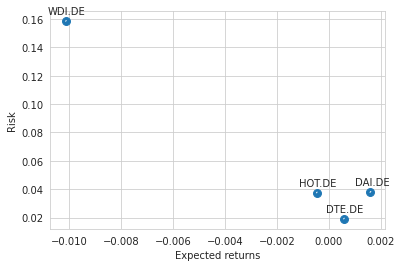

In [76]:
area = np.pi*20

plt.scatter(german_rets.mean(),german_rets.std(), s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x,y in zip(german_rets.columns,german_rets.mean(),german_rets.std()):
  plt.annotate(
      label,
      xy = (x,y), xytext = (20,5),
      textcoords = 'offset points', ha = 'right', va = 'bottom',
      arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [81]:
days = 365

dt = 1/days

mu = german_rets.mean()['DTE.DE']

sigma = german_rets.std()['DTE.DE']

In [82]:
def stock_monte_carlo(start_price,days,mu,sigma):
  price = np.zeros(days)
  price[0] = start_price

  shock = np.zeros(days)
  drift = np.zeros(days)

  for x in range(1,days):

    shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

    drift[x] = mu * dt

    price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

  return price

In [83]:
telekom_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-27,14.758,14.612,14.758,14.716,5591396.0,13.432266
2019-12-30,14.746,14.570,14.732,14.570,5774093.0,13.299004
2020-01-02,14.668,14.534,14.598,14.610,9435019.0,13.335514
2020-01-03,14.628,14.518,14.570,14.614,9232877.0,13.339165
2020-01-06,14.612,14.464,14.580,14.578,7337533.0,13.306305


In [ ]:
#14.758

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

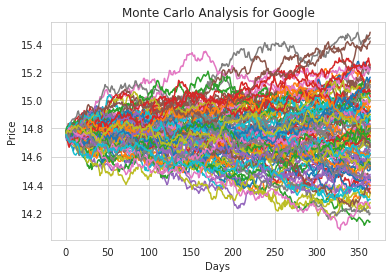

In [84]:
start_price = 14.758

for x in range(100):
  plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [85]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

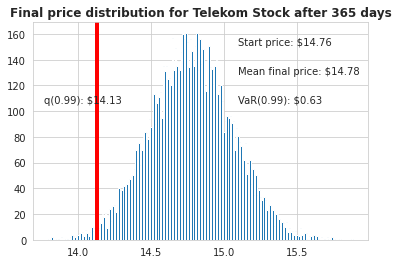

In [86]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#Starting price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price -q,))

# Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color = 'r')

#Title
plt.title(u"Final price distribution for Telekom Stock after %s days" % days, weight = 'bold');

In [87]:
# 2. Look further into correlations of two stocks and see if that gives you any insights into future possible stock prices.

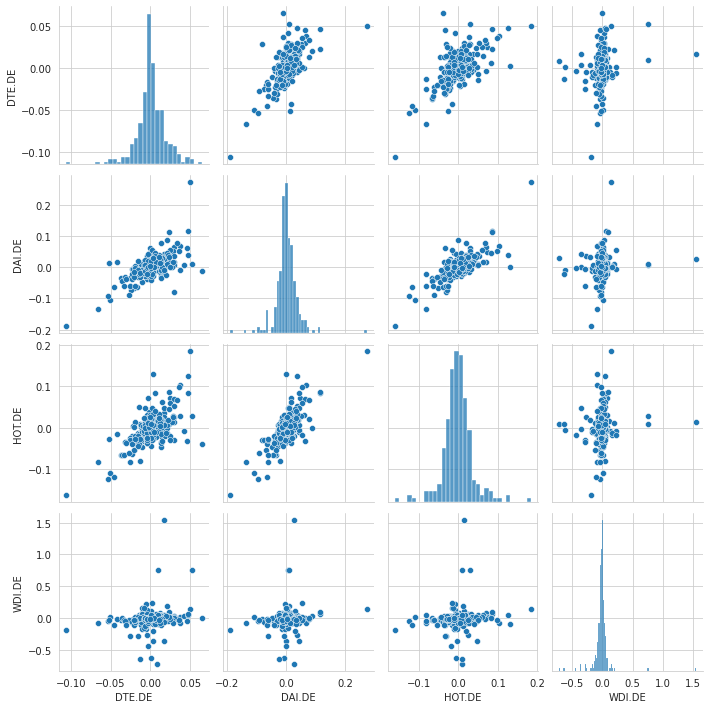

In [88]:
sns.pairplot(german_rets.dropna())

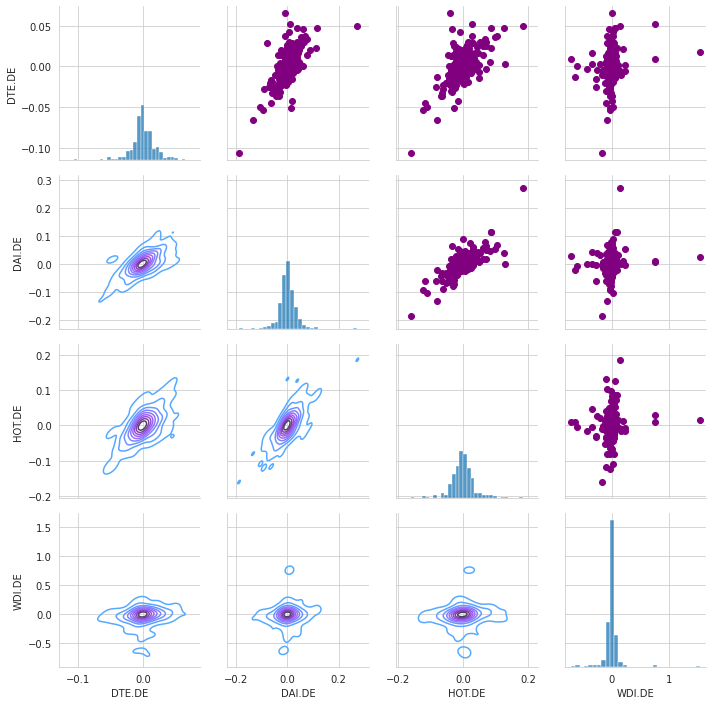

In [89]:
returns_fig = sns.PairGrid(german_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.histplot,bins=30)

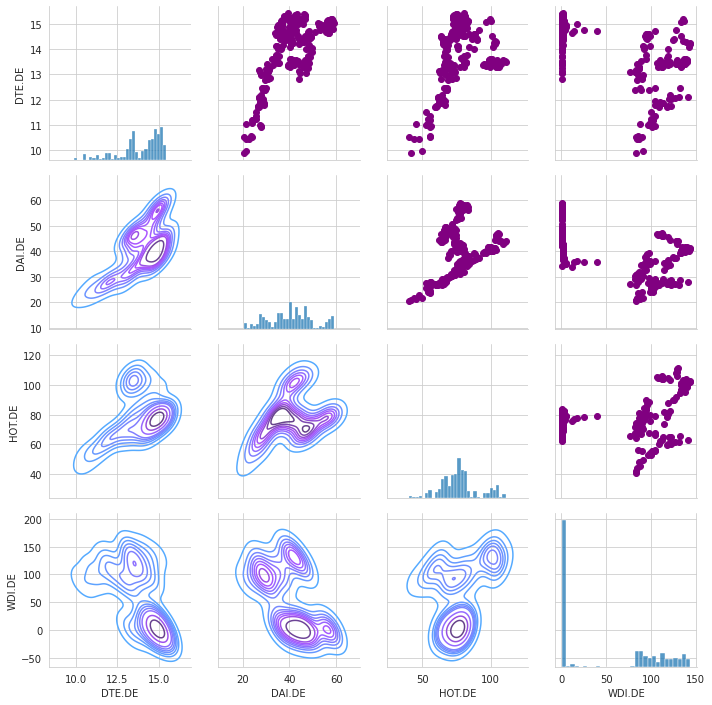

In [90]:
returns_fig = sns.PairGrid(german_closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.histplot,bins=30)

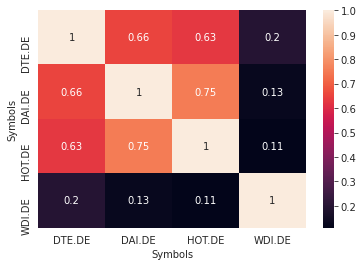

In [91]:
sns.heatmap(data = german_rets.corr(), annot=True)

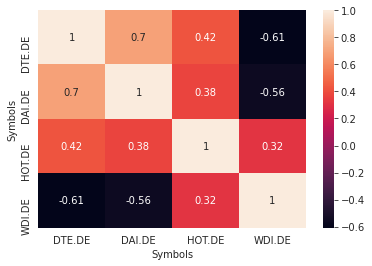

In [92]:
sns.heatmap(data = german_closing_df.corr(), annot=True)